#### **Análise Exploratória**

### *Indice*

- Período de Análise
- Quantidade linhas e colunas
- Informações gerais das colunas

---

In [ ]:
# Executar caso ainda não esteja instalado o pacote do pandas
!pip install pandas

In [ ]:
import pandas as pd
import datetime as dt

base = pd.read_csv('src/netflix_daily_top_ten.csv')

In [9]:

# Quantidade de Linhas e Colunas
df_shape = pd.DataFrame(columns=['linhas', 'colunas'], data=[[base.shape[0], base.shape[1]]])
df_shape

,linhas,colunas
0,7100,10


In [13]:
# Período de Análise

dt_inicio = pd.to_datetime(base['As of']).dt.date.min()
dt_fim = pd.to_datetime(base['As of']).dt.date.max()

df_data = pd.DataFrame(columns=['Data Inicio', 'Data Final'], data=[[dt_inicio, dt_fim]])
df_data

,Data Inicio,Data Final
0,2020-04-01,2022-03-11


In [58]:
# Informações gerais das colunas

lst_data = []

for column in base.columns:
    lst_series = []
    lst_series.append(column)
    lst_series.append(base[column].count())
    lst_series.append(base[column].isnull().sum())
    lst_series.append(base[column].dtype)
    lst_data.append(lst_series)

df_data = pd.DataFrame(columns=['Column', 'Non Null Count', 'Is Null Count', 'Col Type'], data=lst_data)
df_data

,Column,Non Null Count,Is Null Count,Col Type
0,As of,7100,0,object
1,Rank,7100,0,int64
2,Year to Date Rank,7100,0,object
3,Last Week Rank,7100,0,object
4,Title,7100,0,object
5,Type,7100,0,object
6,Netflix Exclusive,4599,2501,object
7,Netflix Release Date,7100,0,object
8,Days In Top 10,7100,0,int64
9,Viewership Score,7100,0,int64


In [71]:
# Informações Estatísticas
base.describe().round(2)

,Rank,Days In Top 10,Viewership Score
count,7100.00,7100.00,7100.00
mean,5.50,24.12,122.79
std,2.87,58.47,213.86
min,1.00,1.00,1.00
25%,3.00,3.00,19.00
50%,5.50,7.00,50.00
75%,8.00,18.00,128.00
max,10.00,428.00,1474.00


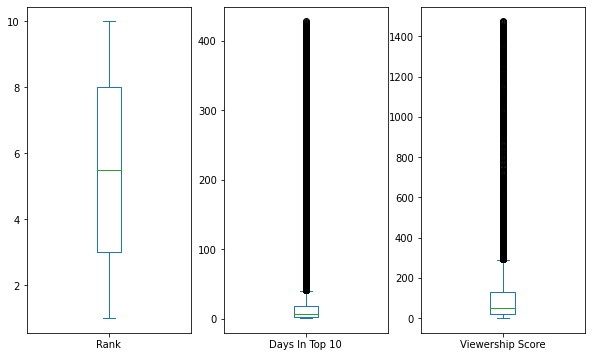

In [72]:
base.plot(kind='box',figsize=(10,6),subplots=True)

In [81]:
df_top_ten_gt_100 = base[base['Days In Top 10'] >= 100]
df_top_ten_gt_100.head(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2886,2021-01-14,7,6,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",100,287
2896,2021-01-15,7,7,10,Cocomelon,TV Show,NaN,"Jun 1, 2020",101,291
2909,2021-01-16,10,7,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",102,292
2919,2021-01-17,10,10,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",103,293
3019,2021-01-27,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",104,294


In [104]:
# df_groupby_title = base.groupby(['Title'])['Days In Top 10'].count().reset_index(name='Days In Top 10').sort_values(by='Days In Top 10', ascending=False)
df_groupby_title = base.Title.value_counts().reset_index(name='Days In Top 10').rename(columns={"index": "Title"})
df_groupby_title

,Title,Days In Top 10
0,Cocomelon,428
1,Ozark,85
2,Cobra Kai,81
3,Manifest,80
4,The Queenâs Gambit,73
...,...,...
640,The Office,1
641,Animals on the Loose: A You…,1
642,Dark,1
643,The Secret Life of Pets 2,1


<AxesSubplot:>

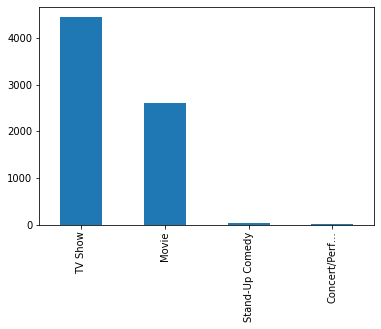

In [105]:
base.Type.value_counts().plot(kind='bar')

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",428,1474


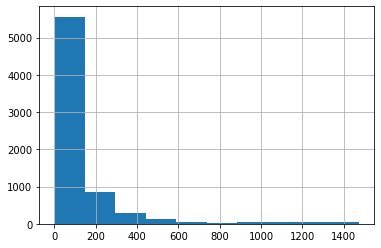

In [118]:
base['Viewership Score'].hist()
base[base['Viewership Score'] == base['Viewership Score'].max()]